# Домашнее задание 2
## Пономарева Алиса БПМ-151

## Дедлайн 22.03.2018 (23.59 московское время) 

### Задание 1 Бэггинг над деревьями
1) Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y.  

2) Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k, равным значению параметра cv. Используйте k=10, чтобы полученные оценки качества имели небольшой разброс.  Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - значений качества в каждом из k экспериментов k-fold cross validation. Получите среднее значение, которое и будет оценкой качества работы.

3) Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. Качество классификации новой модели - среднее значение cross_val_score. Сравните работу композиции деревьев с одним решающем деревом. 

4) Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. Каково качество работы алгоритма? 

5) Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn. Попробуйте выбирать опять же $\sqrt{d}$ признаков. Какое теперь качество полученного классификатора?

6) Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest. Сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble.

7) Изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров.

1) Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


2) Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k, равным значению параметра cv. Используйте k=10, чтобы полученные оценки качества имели небольшой разброс.  Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - значений качества в каждом из k экспериментов k-fold cross validation. Получите среднее значение, которое и будет оценкой качества работы.

In [4]:
from sklearn.cross_validation import cross_val_score

/Users/kostya/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
def mean_cross_val_score(clf,X,y,cv=10):
    return cross_val_score(clf,X,y,cv=cv).mean()

3) Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. Качество классификации новой модели - среднее значение cross_val_score. Сравните работу композиции деревьев с одним решающем деревом. 

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
random_seed = 123

In [8]:
tree_clf = DecisionTreeClassifier(random_state=random_seed)
bag_clf = BaggingClassifier(n_estimators=100,random_state=random_seed)

In [9]:
print("Среднее качество одного дерева:", mean_cross_val_score(tree_clf,X,y))
print("Среднее качество BaggingClassifier: ", mean_cross_val_score(bag_clf,X,y))

Среднее качество одного дерева: 0.834738727191
Среднее качество BaggingClassifier:  0.921546801442


Вывод: Бэггинг над 100 деревьями оказался лучше.

4) Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. Каково качество работы алгоритма? 

In [10]:
X.shape

(1797, 64)

In [11]:
np.sqrt(X.shape[1])

8.0

In [12]:
bag_clf_sqrt = BaggingClassifier(n_estimators=100,max_features=8,random_state=random_seed)

In [13]:
print("Среднее качество BaggingClassifier на sqrt(d) случайных признаков: ", mean_cross_val_score(bag_clf_sqrt,X,y))

Среднее качество BaggingClassifier на sqrt(d) случайных признаков:  0.931519590377


Вывод:стало лучше на 0.01

5) Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn. Попробуйте выбирать опять же $\sqrt{d}$ признаков. Какое теперь качество полученного классификатора?

In [14]:
tree_clf_sqrt = DecisionTreeClassifier(max_features="sqrt", random_state=random_seed)
bag_clf_tree_sqrt = BaggingClassifier(tree_clf_sqrt, n_estimators=100,random_state=random_seed)
print("Среднее качество:",mean_cross_val_score(bag_clf_tree_sqrt,X,y))

Среднее качество: 0.953870669168


Вывод: стало лучше на 0.02

6) Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest. Сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble.

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_clf = RandomForestClassifier(n_estimators=100,max_features="sqrt",random_state=random_seed)
print("Random Forest:",mean_cross_val_score(rf_clf,X,y))
print("Среднее качество BaggingClassifier на sqrt(d) случайных признаков: ", mean_cross_val_score(bag_clf_sqrt,X,y))

Random Forest: 0.951103309525
Среднее качество BaggingClassifier на sqrt(d) случайных признаков:  0.931519590377


7) Изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров.

In [17]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [18]:
def grid_plot(clf,X,y,param):
    gs = GridSearchCV(clf,param)
    gs.fit(X,y)
    t = list(param.keys())[0]
    if (param[t][0]==None): #для max_depth = None
        param[t][0]=param[t][1]+1
    plt.scatter(param[t],gs.cv_results_['mean_test_score'])
    plt.plot(param[t],gs.cv_results_['mean_test_score'])
    plt.xlabel(t)
    plt.ylabel('Mean score')
    plt.show()
    return

In [19]:
clf = RandomForestClassifier(random_state=random_seed)

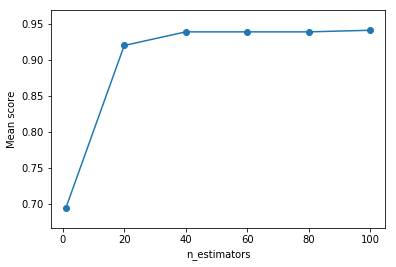

In [20]:
grid_plot(clf,X,y,{'n_estimators':[1,20,40,60,80,100]})

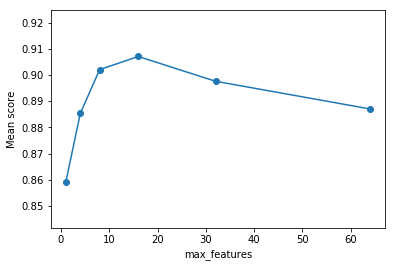

In [21]:
grid_plot(clf,X,y,{'max_features':[1,4,8,16,32,64]})

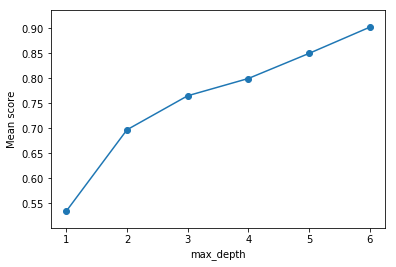

In [22]:
grid_plot(clf,X,y,{"max_depth":[None,5,4,3,2,1]})

## Задание 2 Смещение и разброс методов обучения 

Исследуем численно разброс и смещение различных методов обучения. Данные будем генирировать искусственно, (x,y) - объект выборки представляет собой:

x  - случайная величина из одномерного распределения (рассмотрите три различных распределения: нормальное (np.random.normal(0, 0.3), экспоненциальное (np.random.exponential(0.3)), равномерное (np.random.uniform(-0.5, 0.5));

y (ответ) генерируется как сумма $f(x)=sin(\pi x)$ и случайного шума $\epsilon$ из равномерного распределения на [-0.2. 0.2]:
$$
y=sin(\pi x)+\epsilon
$$

Рассмотрим различные методы обучения: "LinearRegression", "DecisionTree", "RandomForest", "GradientBoosting". 

1) Сгенерируйте выборку размера N_objects=100, т.е. N_objects пар (x,y) из соответствующих распределений. Обучите одну из моделей (например, "LinearRegression") с параметрами по умолчанию на сгенерированной выборке . Постройте на одном графике объекты выборки и восстановленную регрессионную кривую. 

2) Рассмотрите ансамбль обучающих моделей. Сгенерируйте N_samples=25 случайных выборок размера N_objects=100, обучите и постройте все выборки и все регрессионные кривые $\mu^j$ (j=1,2,...25) на одном графике (полупрозрачным). Посчитайте среднюю кривую $\bar{\mu}$  как среднее арифмитическое регрессионных кривых. Изобразите эту кривую тоже на графике, а также истинную кривую ответов ($f(x)=sin(\pi x)$).

3) Вычислите смещение метода обучения: 

$$ Bias= E_{x,y} ((\mathbb{E}[y|x] - \mathbb{E}_X [\mu(X)]))$$. 


3.1) Сгенерируйте  N_objects=100 значений признака x. Для каждого x сгенерируйте N_y=100 значений y, т.е. объект выборки имеет вид:
$$
(x,[y_1,,y_2,,y_3,\dots ,y_{100}])
$$
3.2) Вычислите $\mathbb{E}[y|x]$ на объекте x как среднее арифмитическое значений y: 

$$
\mathbb{E}[y|x]=\frac{1}{N_y}\sum_{i=1}^{N_y} y_i
$$

3.3) Вычислите среднее предсказание $\mathbb{E}_X [\mu(X)]$ на объекте x - это значение построенной функции  $\bar{\mu}$ (см. пункт 2) 

3.4) Математическое ожидание $E_{x,y}(\dots)$ считаем как среднее арифмитическое по выборке N_objects.

4) Вычислите разброс метода обучения. Разброс - это среднеквадратичное отклонение предсказания алгоритмов метода $\mu$ на объекте x от среднего предсказания $\mathbb{E}_X [\mu(X)]$
$$ Var=E_{x,y} (E_{X}(\mathbb{E}_X [\mu(X)] - \mu(X)])^2)$$

4.1) На сгенерированной выборке для каждой кривой $\mu^j$ вычислите среднее арифмитическое по N_objects объектам, построенным в пункте 2: 
$$
Var^j=\frac{1}{N_{objects}}\sum_{i=1}^{N_{objects}} (\mu^j(x_i)-\bar{\mu}(x_i))^2
$$

4.2) Вычислите  среднее арифмитическое по N_samples алгоритмам:
$$
Var=\frac{1}{N_{samples}}\sum_{j=1}^{N_{samples}}Var^j
$$

5) Представьте результаты в виде таблицы, проанализируйте какой метод дает наименьший разброс, какой наименьшее смещение (почему?), как смещение и разброс связаны с распределением признака x. 

## Решение

In [23]:
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

1) Сгенерируйте выборку размера N_objects=100, т.е. N_objects пар (x,y) из соответствующих распределений. Обучите одну из моделей (например, "LinearRegression") с параметрами по умолчанию на сгенерированной выборке . Постройте на одном графике объекты выборки и восстановленную регрессионную кривую.

In [24]:
N_objects = 100

In [25]:
lin_clf = LinearRegression()

In [26]:
x_1 = np.sort(np.random.normal(0, 0.3,size=(N_objects,1)),axis=0)
x_2 = np.sort(np.random.exponential(0.3,size= (N_objects,1)),axis=0)
x_3 = np.sort(np.random.uniform(-0.5,0.5,size=(N_objects,1)),axis=0)

In [27]:
y_1 = np.sin(np.pi*x_1) +  np.random.uniform(-0.2, 0.2,size=(N_objects,1))
y_2 = np.sin(np.pi*x_2) +  np.random.uniform(-0.2, 0.2,size=(N_objects,1))
y_3 = np.sin(np.pi*x_3) +  np.random.uniform(-0.2, 0.2,size=(N_objects,1))

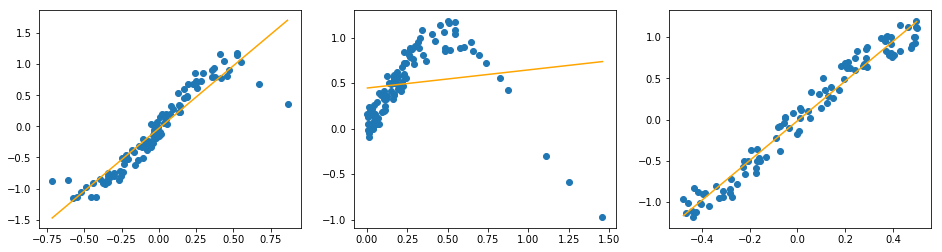

In [28]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.scatter(x_1,y_1)
lin_clf.fit(x_1,y_1)
plt.plot(x_1, lin_clf.predict(x_1), c='orange')

plt.subplot(1,3,2)
plt.scatter(x_2,y_2)
lin_clf.fit(x_2,y_2)
plt.plot(x_2, lin_clf.predict(x_2), c='orange')

plt.subplot(1,3,3)
plt.scatter(x_3,y_3)
lin_clf.fit(x_3,y_3)
plt.plot(x_3, lin_clf.predict(x_3), c='orange')
plt.show()

2) Рассмотрите ансамбль обучающих моделей. Сгенерируйте N_samples=25 случайных выборок размера N_objects=100, обучите и постройте все выборки и все регрессионные кривые $\mu^j$ (j=1,2,...25) на одном графике (полупрозрачным). Посчитайте среднюю кривую $\bar{\mu}$  как среднее арифмитическое регрессионных кривых. Изобразите эту кривую тоже на графике, а также истинную кривую ответов ($f(x)=sin(\pi x)$).

In [29]:
N_samples = 25
colors = ["navy","gold","green","red"]

In [30]:
def true_y(t):
    return np.array([math.sin(math.pi*x) for x in t])

In [31]:
arr=[]
mint = [10,10,10]
maxt = [-10,-10,-10]
for i in range (N_samples):
    x_1 = np.sort(np.random.normal(0, 0.3,size=(N_objects,1)),axis=0)
    x_2 = np.sort(np.random.exponential(0.3,size= (N_objects,1)),axis=0)
    x_3 = np.sort(np.random.uniform(-0.5,0.5,size=(N_objects,1)),axis=0)
    y_1 = np.sin(np.pi*x_1) +  np.random.uniform(-0.2, 0.2,size=(N_objects,1))
    y_2 = np.sin(np.pi*x_2) +  np.random.uniform(-0.2, 0.2,size=(N_objects,1))
    y_3 = np.sin(np.pi*x_3) +  np.random.uniform(-0.2, 0.2,size=(N_objects,1))
    xy_i = [[x_1,x_2,x_3],[y_1,y_2,y_3]]
    for t in range(3):
        if (xy_i[0][t].min() < mint[t]):
            mint[t] = xy_i[0][t].min()
        if (xy_i[0][t].max() > maxt[t]):
            maxt[t] = xy_i[0][t].max()
    arr.append(xy_i)

x_x = []
for t in range(3):
    x_x.append(np.arange(mint[t],maxt[t],0.01).reshape(-1,1))

In [32]:
clfs = []
for i in range(N_samples):
    clf_i = []
    for j in range(3):
        xj_i = np.ravel(arr[i][0][j]).reshape(-1,1)
        yj_i = np.ravel(arr[i][1][j])
        clf_i_j = []
        for clf in [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]:
            clf.fit(xj_i,yj_i)
            clf_i_j.append(clf)
        clf_i.append(clf_i_j)
    clfs.append(clf_i)

In [33]:
title = ['LinearRegression','DecisionTreeRegressor', 'RandomForestRegressor','GradientBoostingRegressor']
model = [' Нормальное распредление', 'Экспонента', 'Равномерное']

In [34]:
def plot_ensemble(j,k,rows=1,cols=1,ind=1):

    plt.subplot(rows,cols,ind)
    plt.title(title[k]+' '+model[j])
    tpred = np.zeros(len(x_x[j]))
    for i in range(25):
        t = clfs[i][j][k].predict(x_x[j])
        plt.plot(x_x[j],t,c=colors[k],linewidth=0.4,alpha=0.5)
        tpred=tpred + t
    plt.plot(x_x[j],true_y(x_x[j]),c="mediumslateblue")
    plt.plot(x_x[j],tpred/25,c="black")

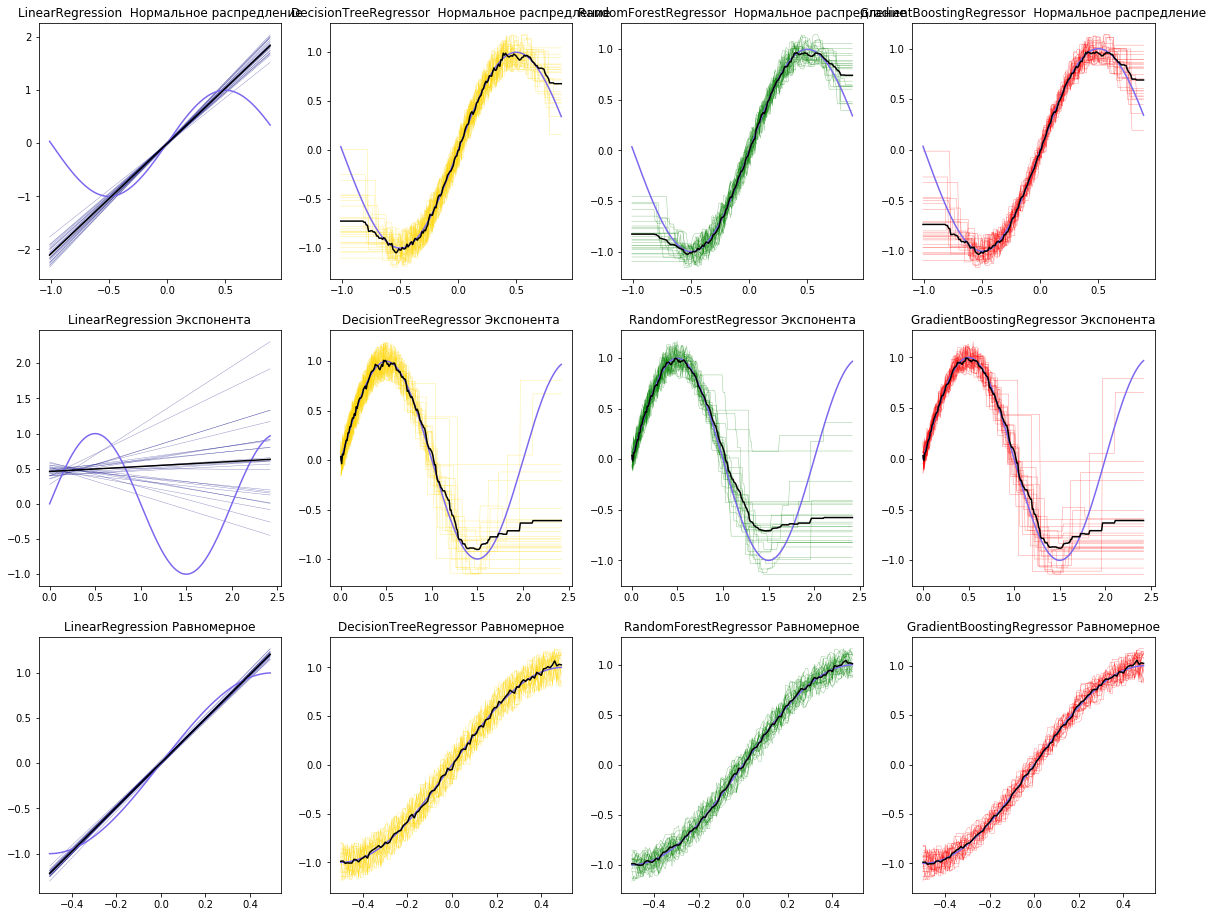

In [35]:
plt.figure(figsize=(20,16))
for j in range(3):
    for k in range(4):
        plot_ensemble(j,k,3,4,j*4+k+1)
plt.show()

3) Вычислите смещение метода обучения: 

$$ Bias= E_{x,y} ((\mathbb{E}[y|x] - \mathbb{E}_X [\mu(X)]))$$. 


3.1) Сгенерируйте  N_objects=100 значений признака x. Для каждого x сгенерируйте N_y=100 значений y, т.е. объект выборки имеет вид:
$$
(x,[y_1,,y_2,,y_3,\dots ,y_{100}])
$$
3.2) Вычислите $\mathbb{E}[y|x]$ на объекте x как среднее арифмитическое значений y: 

$$
\mathbb{E}[y|x]=\frac{1}{N_y}\sum_{i=1}^{N_y} y_i
$$

3.3) Вычислите среднее предсказание $\mathbb{E}_X [\mu(X)]$ на объекте x - это значение построенной функции  $\bar{\mu}$ (см. пункт 2) 

3.4) Математическое ожидание $E_{x,y}(\dots)$ считаем как среднее арифмитическое по выборке N_objects.

In [36]:
def gen_x_n():
    return np.sort(np.random.normal(0, 0.3,size=(N_objects,1)),axis=0)
def gen_x_e():
    return np.sort(np.random.exponential(0.3,size= (N_objects,1)),axis=0)
def gen_x_u():
    return np.sort(np.random.uniform(-0.5,0.5,size=(N_objects,1)),axis=0)
def gen_y(x):
    return np.sin(np.pi*x) +  np.random.uniform(-0.2, 0.2,size=(N_objects,1))

In [37]:
x_n = gen_x_n()
x_e = gen_x_e()
x_u = gen_x_u()
y100_n = gen_y(x_n)
y100_e = gen_y(x_e)
y100_u = gen_y(x_u)
for i in range(99):
    y_n = gen_y(x_n)
    y_e = gen_y(x_e)
    y_u = gen_y(x_u)
    y100_n = np.hstack((y100_n,y_n))
    y100_e = np.hstack((y100_e,y_e))
    y100_u = np.hstack((y100_u,y_u))

In [38]:
y100_n.shape

(100, 100)

In [39]:
y_mean_n = np.array(y100_n[0].mean())
y_mean_e = np.array(y100_e[0].mean())
y_mean_u = np.array(y100_u[0].mean())
for i in range(1,100):
    y_mean_n = np.vstack((y_mean_n,y100_n[i].mean()))
    y_mean_e = np.vstack((y_mean_e,y100_e[i].mean()))
    y_mean_u = np.vstack((y_mean_u,y100_u[i].mean()))

In [40]:
y_mean_n.shape

(100, 1)

In [41]:
y_mean = [y_mean_n,y_mean_e,y_mean_u]

In [42]:
def clf_mean_pred(j,k,x):
    result = []
    for i in range(25):
        result.append(clfs[i][j][k].predict(x))
    return np.array(result).mean(axis=0)

In [43]:
x = [x_n,x_e,x_u]

In [44]:
model_mean = []
for j in range(3):
    temp = []
    for k in range(4):
        temp.append(clf_mean_pred(j,k,x[j]))
    model_mean.append(np.array(temp))
model_mean = np.array(model_mean)

In [45]:
model_mean.shape

(3, 4, 100)

In [46]:
result = []
for i in range(3):
    temp = []
    for j in range(4):
        temp.append(y_mean[i].ravel() - model_mean[i][j])
    result.append(np.array(temp))
result = np.array(result)

In [47]:
bias = pd.DataFrame(result.mean(axis=2),columns = title,index = model)
bias

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor
Нормальное распредление,0.027344,0.000993,0.002962,0.003053
Экспонента,0.047483,0.003728,0.000242,0.004070
Равномерное,0.000253,0.003024,0.000832,0.000099


4) Вычислите разброс метода обучения. Разброс - это среднеквадратичное отклонение предсказания алгоритмов метода $\mu$ на объекте x от среднего предсказания $\mathbb{E}_X [\mu(X)]$
$$ Var=E_{x,y} (E_{X}(\mathbb{E}_X [\mu(X)] - \mu(X)])^2)$$

4.1) На сгенерированной выборке для каждой кривой $\mu^j$ вычислите среднее арифмитическое по N_objects объектам, построенным в пункте 2: 
$$
Var^j=\frac{1}{N_{objects}}\sum_{i=1}^{N_{objects}} (\mu^j(x_i)-\bar{\mu}(x_i))^2
$$

4.2) Вычислите  среднее арифмитическое по N_samples алгоритмам:
$$
Var=\frac{1}{N_{samples}}\sum_{j=1}^{N_{samples}}Var^j
$$

In [48]:
np.power(np.array([i for i in range(10)]),2)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [49]:
clfs[24][2][3].predict(x_e).shape

(100,)

In [50]:
np.power(clfs[j][i][k].predict(x[i])-model_mean[i][k],2).mean()

0.0044754045597899996

In [51]:
var = []
for j in range(25):
    var_j = []
    for i in range(3):
        temp = []
        for k in range(4):
            temp.append(np.power(clfs[j][i][k].predict(x[i])-model_mean[i][k],2).mean())
        var_j.append(np.array(temp))
    var.append(np.array(var_j))
var = np.array(var)

In [52]:
var_df = pd.DataFrame(var.mean(axis=0),columns = title,index = model)
var_df

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor
Нормальное распредление,0.001630,0.012867,0.006941,0.006333
Экспонента,0.009561,0.015375,0.009287,0.008664
Равномерное,0.000419,0.013261,0.006904,0.006262


5) Представьте результаты в виде таблицы, проанализируйте какой метод дает наименьший разброс, какой наименьшее смещение (почему?), как смещение и разброс связаны с распределением признака x. 

In [53]:
bias

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor
Нормальное распредление,0.027344,0.000993,0.002962,0.003053
Экспонента,0.047483,0.003728,0.000242,0.004070
Равномерное,0.000253,0.003024,0.000832,0.000099


### Смещение
- Нормальное распределение
    - лучшее у RandomForestRegressor, но не сильно отличается от DecisionTreeRegressor и GradientBoostingRegressor
- Экспонента
    - GradientBoostingRegressor справляется лучше всех
- Равномерное
    - Все значения не сильно различаются но лучшее у LinearRegression

In [54]:
var_df

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor
Нормальное распредление,0.001630,0.012867,0.006941,0.006333
Экспонента,0.009561,0.015375,0.009287,0.008664
Равномерное,0.000419,0.013261,0.006904,0.006262


### Разброс
- Нормальное распределение
    - лучшее у LinearRegression
- Экспонента
    - Кроме DecisionTreeRegressor, значения не сильно различаются, но лучшее у LinearRegression
- Равномерное
    - Однозначно лучшее у LinearRegression

# Задание 3 Кластеризация

1) На данных по рукописным цифрам (см. задание 1) постройте модель кластеризации K_means.  


In [55]:
from sklearn.datasets import load_digits
digits = load_digits()

In [56]:
X = digits.data
y = digits.target

In [57]:
from sklearn import cluster
from sklearn import metrics

In [58]:
KMeansmodel = cluster.KMeans()

In [59]:
pred =KMeansmodel.fit_predict(X)

2) Используйте полученные метки кластеров как новый признак. Как изменится точность классификации при добавлении нового признака? Выведите соответствующую матрицу ошибок, метрики качества при микро и макро усреднении (используйте classification_report). В качестве классификатора используйте логистическую регрессию.

In [60]:
Xnew = np.hstack((X,pred.reshape((-1,1))))

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
LogisticRegressionModel1 = LogisticRegression()

In [63]:
LogisticRegressionModel1.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
print(metrics.classification_report(y,LogisticRegressionModel1.predict(X)))
print(metrics.confusion_matrix(y,LogisticRegressionModel1.predict(X)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.97      0.98      0.98       182
          2       1.00      1.00      1.00       177
          3       0.98      1.00      0.99       183
          4       1.00      1.00      1.00       181
          5       1.00      1.00      1.00       182
          6       1.00      1.00      1.00       181
          7       1.00      1.00      1.00       179
          8       0.98      0.97      0.97       174
          9       1.00      0.98      0.99       180

avg / total       0.99      0.99      0.99      1797

[[178   0   0   0   0   0   0   0   0   0]
 [  0 179   0   1   0   0   0   0   2   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   5   0   1

In [65]:
LogisticRegressionModel2 = LogisticRegression()

In [66]:
LogisticRegressionModel2.fit(Xnew,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
print(metrics.classification_report(y,LogisticRegressionModel2.predict(Xnew)))
print(metrics.confusion_matrix(y,LogisticRegressionModel2.predict(Xnew)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.98      0.99      0.99       182
          2       1.00      1.00      1.00       177
          3       0.99      1.00      1.00       183
          4       1.00      1.00      1.00       181
          5       0.99      1.00      1.00       182
          6       1.00      1.00      1.00       181
          7       1.00      1.00      1.00       179
          8       0.97      0.97      0.97       174
          9       1.00      0.98      0.99       180

avg / total       0.99      0.99      0.99      1797

[[178   0   0   0   0   0   0   0   0   0]
 [  0 180   0   0   0   0   0   0   2   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   3   0   1

Вывод: лучше на 1 элемент